# Find publicly available data for key *supply-demand* factors that influence US home prices *nationally*. Then, build a data science model that explains how these factors impacted home prices over the last 20 years. Use the S&P Case-Schiller Home Price Index as a proxy for home prices: fred.stlouisfed.org/series/CSUSHPISA.

In [95]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style
import seaborn as sns
from scipy.stats import zscore                               
from sklearn.preprocessing import StandardScaler                    
from sklearn.preprocessing import MinMaxScaler                       
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics, model_selection                         
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,accuracy_score,roc_auc_score,roc_curve, precision_recall_curve
from sklearn.model_selection import train_test_split, GridSearchCV    
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import scale

%matplotlib inline
sns.set(color_codes=True)
sns.set_palette('Accent_r')
%config InlineBackend.figure_format ='retina'
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_homellc=pd.read_excel('HomeLLC_Dataset.xlsx')

In [3]:
df_homellc.head()

,YEAR,UNEMPLOYMENT_RATE,GDP (Dollars),PERMIT,POPULATION_GROWTH,RECESSION,TAX,LIFE_EXPECTANCY,MORTGAGE,CPI,INCOME,HOME_PRICE_INDEX
0,2002-01-01,5.783333,10929.10825,1749.000000,287954.583333,0,626,76.936585,6.537308,180.258333,27700,122.287667
1,2003-01-01,5.991667,11456.44950,1888.416667,290626.250000,0,611,77.036585,5.826981,184.800000,27830,133.741500
2,2004-01-01,5.541667,12217.19575,2057.583333,293262.333333,0,595,77.487805,5.839231,189.541667,27831,150.464333
3,2005-01-01,5.083333,13039.19700,2160.083333,295992.916667,0,667,77.487805,5.866731,195.716667,27832,171.779333
4,2006-01-01,4.608333,13815.58300,1843.666667,298817.666667,0,649,77.687805,6.413269,203.158333,27833,183.481917


In [4]:
df_homellc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   YEAR               21 non-null     datetime64[ns]
 1   UNEMPLOYMENT_RATE  21 non-null     float64       
 2   GDP (Dollars)      21 non-null     float64       
 3   PERMIT             21 non-null     float64       
 4   POPULATION_GROWTH  21 non-null     float64       
 5   RECESSION          21 non-null     int64         
 6   TAX                21 non-null     int64         
 7   LIFE_EXPECTANCY    20 non-null     float64       
 8   MORTGAGE           21 non-null     float64       
 9   CPI                21 non-null     float64       
 10  INCOME             21 non-null     int64         
 11  HOME_PRICE_INDEX   21 non-null     float64       
dtypes: datetime64[ns](1), float64(8), int64(3)
memory usage: 2.1 KB


In [5]:
df_homellc.describe().T

,count,mean,std,min,25%,50%,75%,max
UNEMPLOYMENT_RATE,21.0,6.000397,1.849329,3.600000,4.616667,5.541667,7.358333,9.608333
GDP (Dollars),21.0,16886.057976,3940.254821,10929.108250,14474.227000,16253.970000,19477.336500,25463.000000
PERMIT,21.0,1329.904762,476.404097,582.000000,988.000000,1327.750000,1740.000000,2160.083333
POPULATION_GROWTH,21.0,313537.523810,14873.997294,287954.583333,301696.166667,314725.416667,326859.666667,333595.000000
RECESSION,21.0,0.142857,0.358569,0.000000,0.000000,0.000000,0.000000,1.000000
TAX,21.0,1661.666667,1135.804047,582.000000,638.000000,691.000000,2631.000000,3423.000000
LIFE_EXPECTANCY,20.0,78.051829,0.791331,76.000000,77.487805,78.464634,78.653659,78.841463
MORTGAGE,21.0,4.757651,1.120580,3.000000,3.935769,4.544615,5.839231,6.537308
CPI,21.0,229.831861,32.712282,180.258333,209.582583,222.713833,251.231167,301.000000
INCOME,21.0,27832.857143,30.982714,27700.000000,27834.000000,27839.000000,27844.000000,27849.000000


In [6]:
df_homellc.shape

(21, 12)

In [7]:
print('Number of Duplicates =', df_homellc.duplicated().sum().sum())

Number of Duplicates = 0


In [8]:
df_homellc.isnull().sum()

YEAR                 0
UNEMPLOYMENT_RATE    0
GDP (Dollars)        0
PERMIT               0
POPULATION_GROWTH    0
RECESSION            0
TAX                  0
LIFE_EXPECTANCY      1
MORTGAGE             0
CPI                  0
INCOME               0
HOME_PRICE_INDEX     0
dtype: int64

In [9]:
df_homellc1 = df_homellc.drop('YEAR', axis=1)

In [10]:
df_homellc1

,UNEMPLOYMENT_RATE,GDP (Dollars),PERMIT,POPULATION_GROWTH,RECESSION,TAX,LIFE_EXPECTANCY,MORTGAGE,CPI,INCOME,HOME_PRICE_INDEX
0,5.783333,10929.10825,1749.000000,287954.583333,0,626,76.936585,6.537308,180.258333,27700,122.287667
1,5.991667,11456.44950,1888.416667,290626.250000,0,611,77.036585,5.826981,184.800000,27830,133.741500
2,5.541667,12217.19575,2057.583333,293262.333333,0,595,77.487805,5.839231,189.541667,27831,150.464333
3,5.083333,13039.19700,2160.083333,295992.916667,0,667,77.487805,5.866731,195.716667,27832,171.779333
4,4.608333,13815.58300,1843.666667,298817.666667,0,649,77.687805,6.413269,203.158333,27833,183.481917
5,4.616667,14474.22700,1391.500000,301696.166667,0,582,77.987805,6.337308,209.582583,27834,179.943667
6,5.800000,14769.86150,895.833333,304543.083333,1,674,78.039024,6.027170,216.255083,27835,164.062333
7,9.283333,14478.06675,582.000000,307240.083333,1,657,78.390244,5.036538,217.057833,27836,148.552750
8,9.608333,15048.97000,603.666667,309838.833333,0,606,78.541463,4.689808,216.253500,27837,144.665333
9,8.933333,15599.73175,624.000000,312295.250000,0,638,78.641463,4.447885,219.104250,27838,139.243917


In [11]:
df_homellc1['LIFE_EXPECTANCY'] = df_homellc1['LIFE_EXPECTANCY'].fillna(df_homellc1['LIFE_EXPECTANCY'].mean())

In [12]:
df_homellc1

,UNEMPLOYMENT_RATE,GDP (Dollars),PERMIT,POPULATION_GROWTH,RECESSION,TAX,LIFE_EXPECTANCY,MORTGAGE,CPI,INCOME,HOME_PRICE_INDEX
0,5.783333,10929.10825,1749.000000,287954.583333,0,626,76.936585,6.537308,180.258333,27700,122.287667
1,5.991667,11456.44950,1888.416667,290626.250000,0,611,77.036585,5.826981,184.800000,27830,133.741500
2,5.541667,12217.19575,2057.583333,293262.333333,0,595,77.487805,5.839231,189.541667,27831,150.464333
3,5.083333,13039.19700,2160.083333,295992.916667,0,667,77.487805,5.866731,195.716667,27832,171.779333
4,4.608333,13815.58300,1843.666667,298817.666667,0,649,77.687805,6.413269,203.158333,27833,183.481917
5,4.616667,14474.22700,1391.500000,301696.166667,0,582,77.987805,6.337308,209.582583,27834,179.943667
6,5.800000,14769.86150,895.833333,304543.083333,1,674,78.039024,6.027170,216.255083,27835,164.062333
7,9.283333,14478.06675,582.000000,307240.083333,1,657,78.390244,5.036538,217.057833,27836,148.552750
8,9.608333,15048.97000,603.666667,309838.833333,0,606,78.541463,4.689808,216.253500,27837,144.665333
9,8.933333,15599.73175,624.000000,312295.250000,0,638,78.641463,4.447885,219.104250,27838,139.243917


In [13]:
df_homellc1.isnull().sum()

UNEMPLOYMENT_RATE    0
GDP (Dollars)        0
PERMIT               0
POPULATION_GROWTH    0
RECESSION            0
TAX                  0
LIFE_EXPECTANCY      0
MORTGAGE             0
CPI                  0
INCOME               0
HOME_PRICE_INDEX     0
dtype: int64

### We have imported the dataset and it consists of past 20 years data. We have considered totally 12 factors that influence US home price. Among these 12 factors we are ignoring the "Year" column for our analysis.

### The following factors are choosen for the analysis
#### 1)UNEMPLOYMENT_RATE
#### 2)GDP (Dollars)
#### 3)PERMIT
#### 4)POPULATION_GROWTH
#### 5)RECESSION
#### 6)TAX
#### 7)LIFE_EXPECTANCY
#### 8)MORTGAGE
#### 9)CPI
#### 10)INCOME
#### 11)HOME_PRICE_INDEX

### We have checked for the duplicate and null values. There is no duplicate value present in the dataset but we have one null value in the column "LIFE_EXPECTANCY". So, we have imputed the null value with mean value.

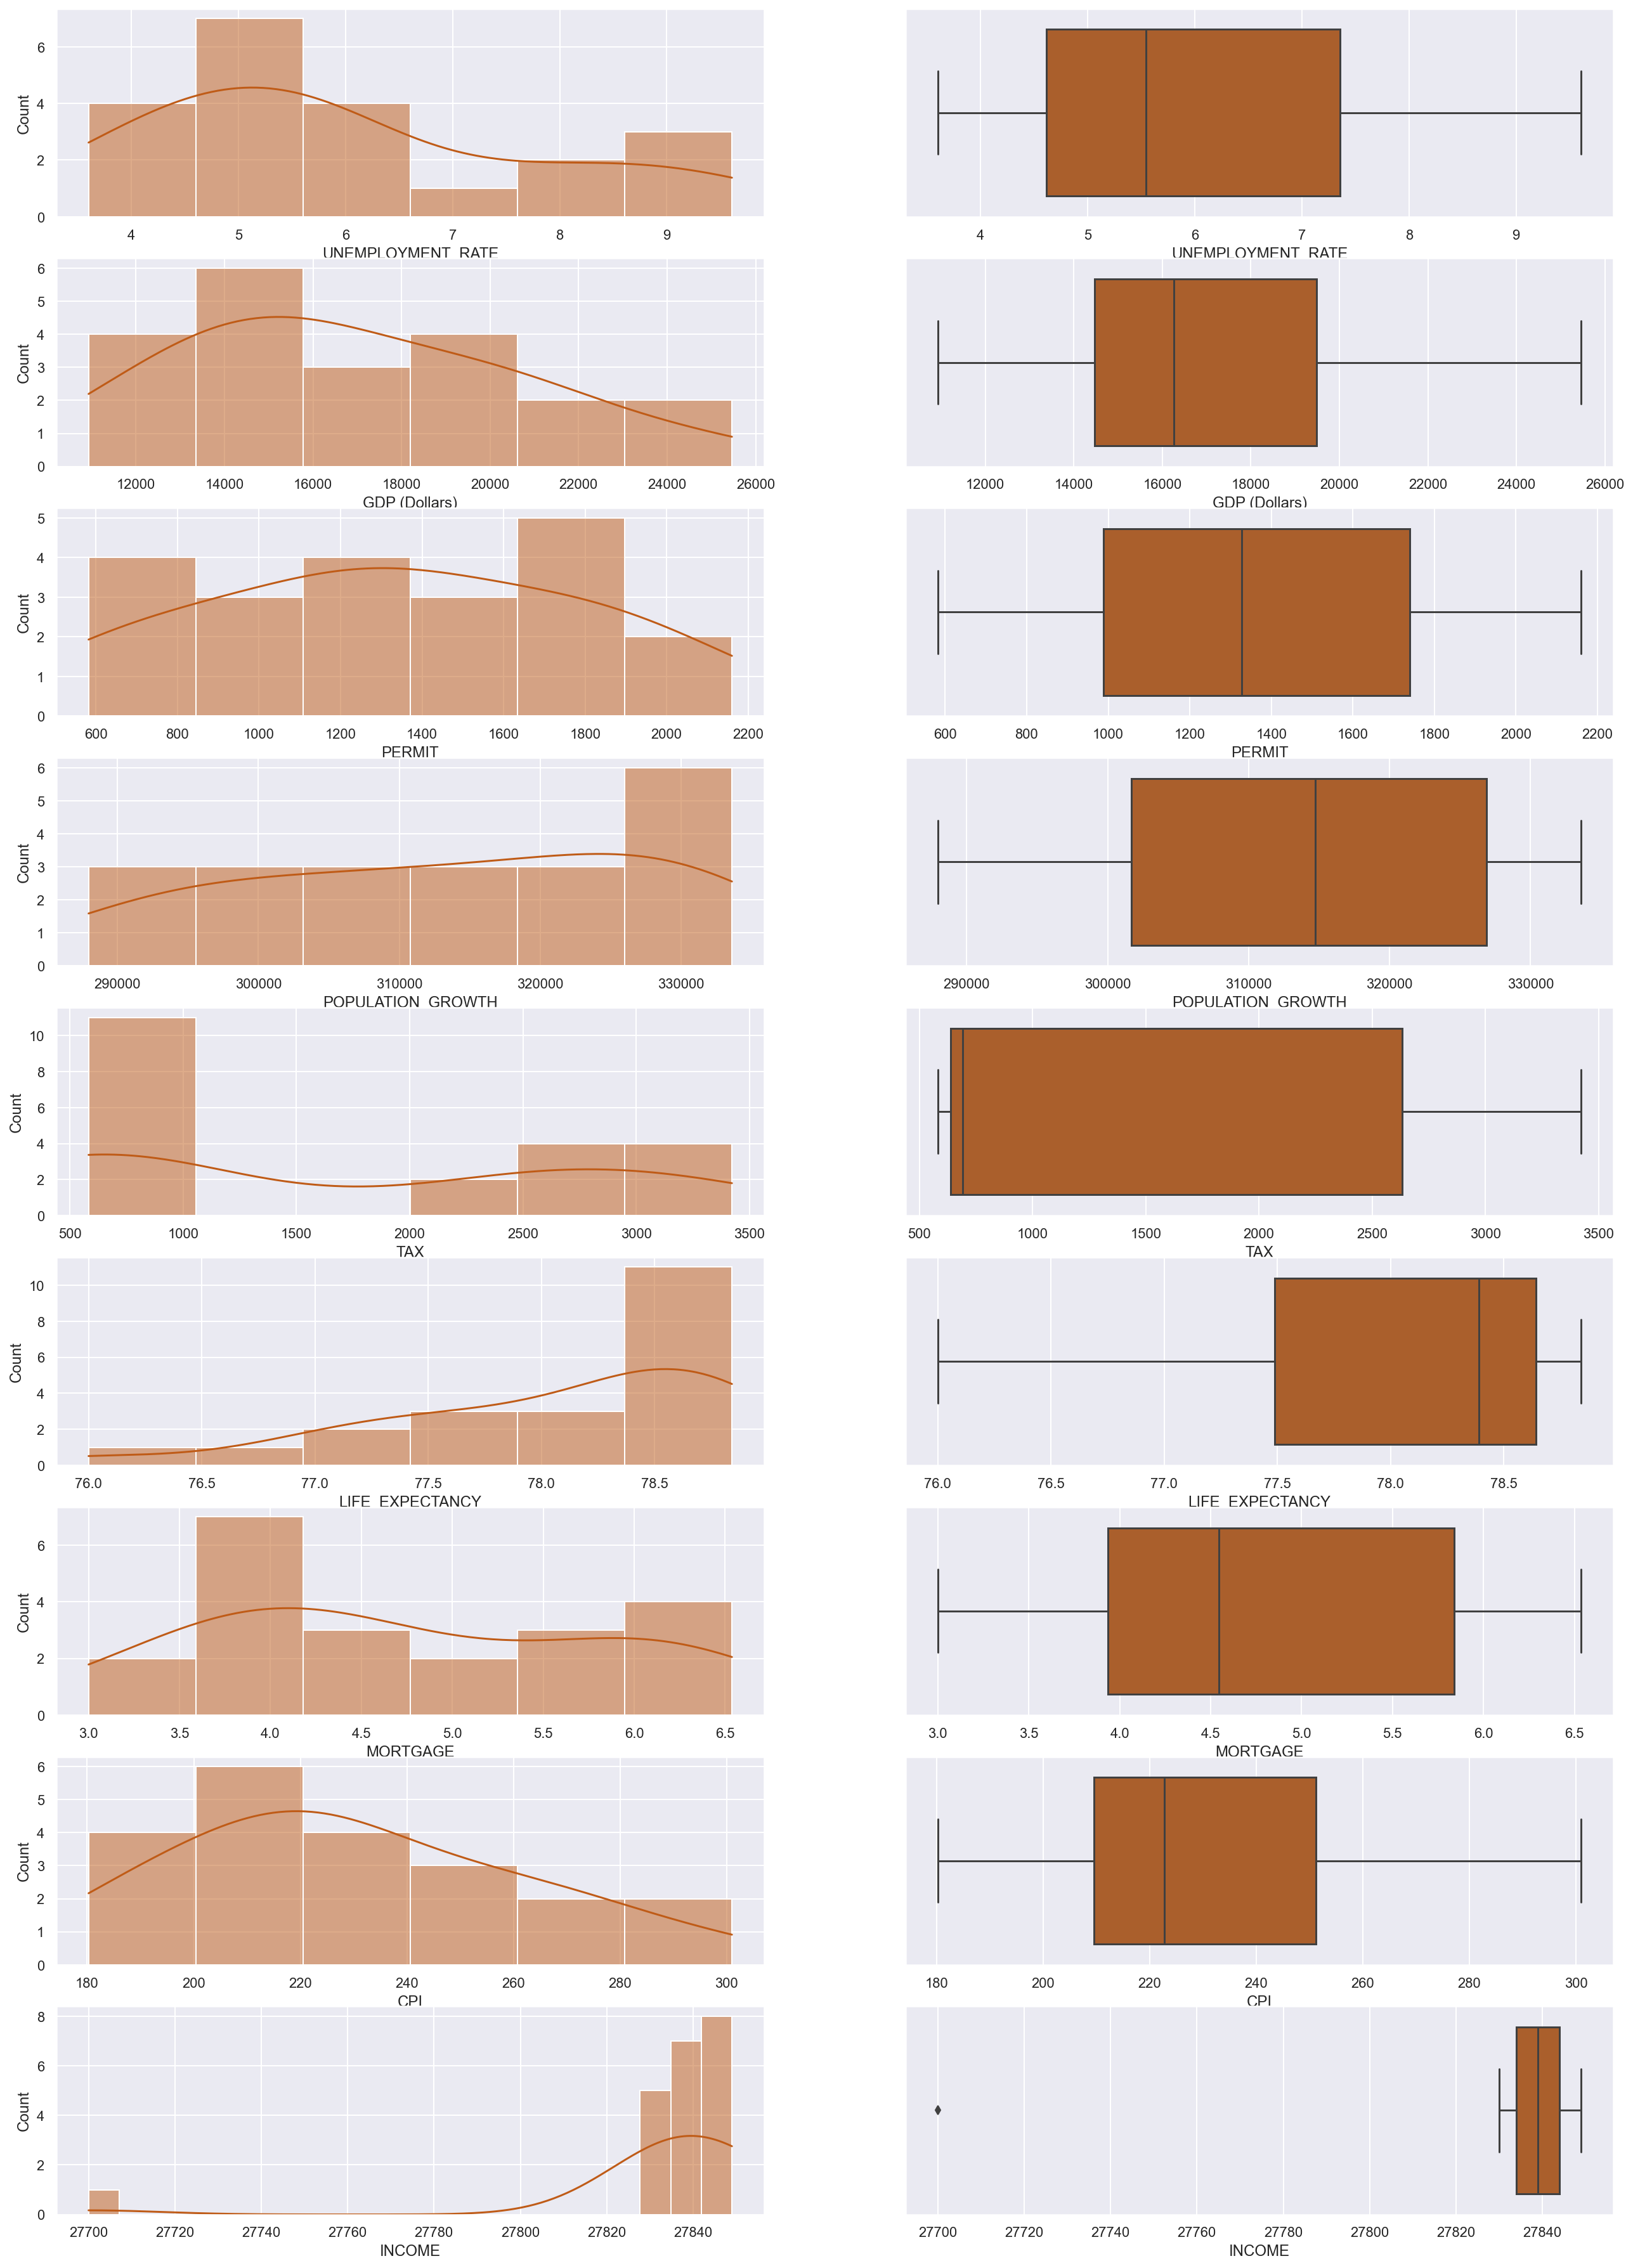

In [14]:
fig, axes = plt.subplots(nrows=9,ncols=2)
fig.set_size_inches(22,32)

sns.histplot(df_homellc1['UNEMPLOYMENT_RATE'], kde=True, ax=axes[0][0])
sns.boxplot(x='UNEMPLOYMENT_RATE', data=df_homellc1, ax=axes[0][1])


sns.histplot(df_homellc1['GDP (Dollars)'] , kde=True, ax=axes[1][0])
sns.boxplot(x='GDP (Dollars)', data=df_homellc1 , ax=axes[1][1])


sns.histplot(df_homellc1['PERMIT'] , kde=True, ax=axes[2][0])
sns.boxplot(x='PERMIT', data=df_homellc1 , ax=axes[2][1])

sns.histplot(df_homellc1['POPULATION_GROWTH'] , kde=True, ax=axes[3][0])
sns.boxplot(x='POPULATION_GROWTH', data=df_homellc1 , ax=axes[3][1])

sns.histplot(df_homellc1['TAX'] , kde=True, ax=axes[4][0])
sns.boxplot(x='TAX', data=df_homellc1 , ax=axes[4][1])

sns.histplot(df_homellc1['LIFE_EXPECTANCY'] , kde=True, ax=axes[5][0])
sns.boxplot(x='LIFE_EXPECTANCY', data=df_homellc1 , ax=axes[5][1])

sns.histplot(df_homellc1['MORTGAGE'] , kde=True, ax=axes[6][0])
sns.boxplot(x='MORTGAGE', data=df_homellc1 , ax=axes[6][1])

sns.histplot(df_homellc1['CPI'] , kde=True, ax=axes[7][0])
sns.boxplot(x='CPI', data=df_homellc1 , ax=axes[7][1])

sns.histplot(df_homellc1['INCOME'] , kde=True, ax=axes[8][0])
sns.boxplot(x='INCOME', data=df_homellc1 , ax=axes[8][1])

plt.show();

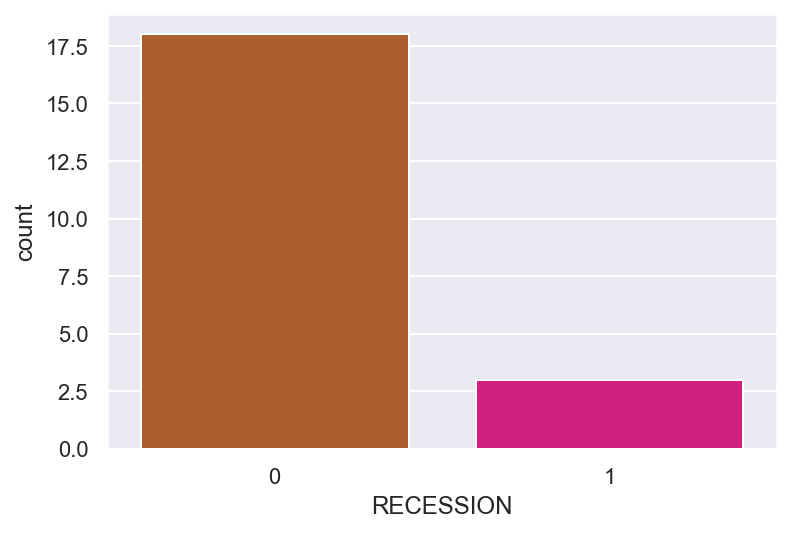

In [15]:
sns.countplot(data=df_homellc1,x= 'RECESSION')
plt.show();

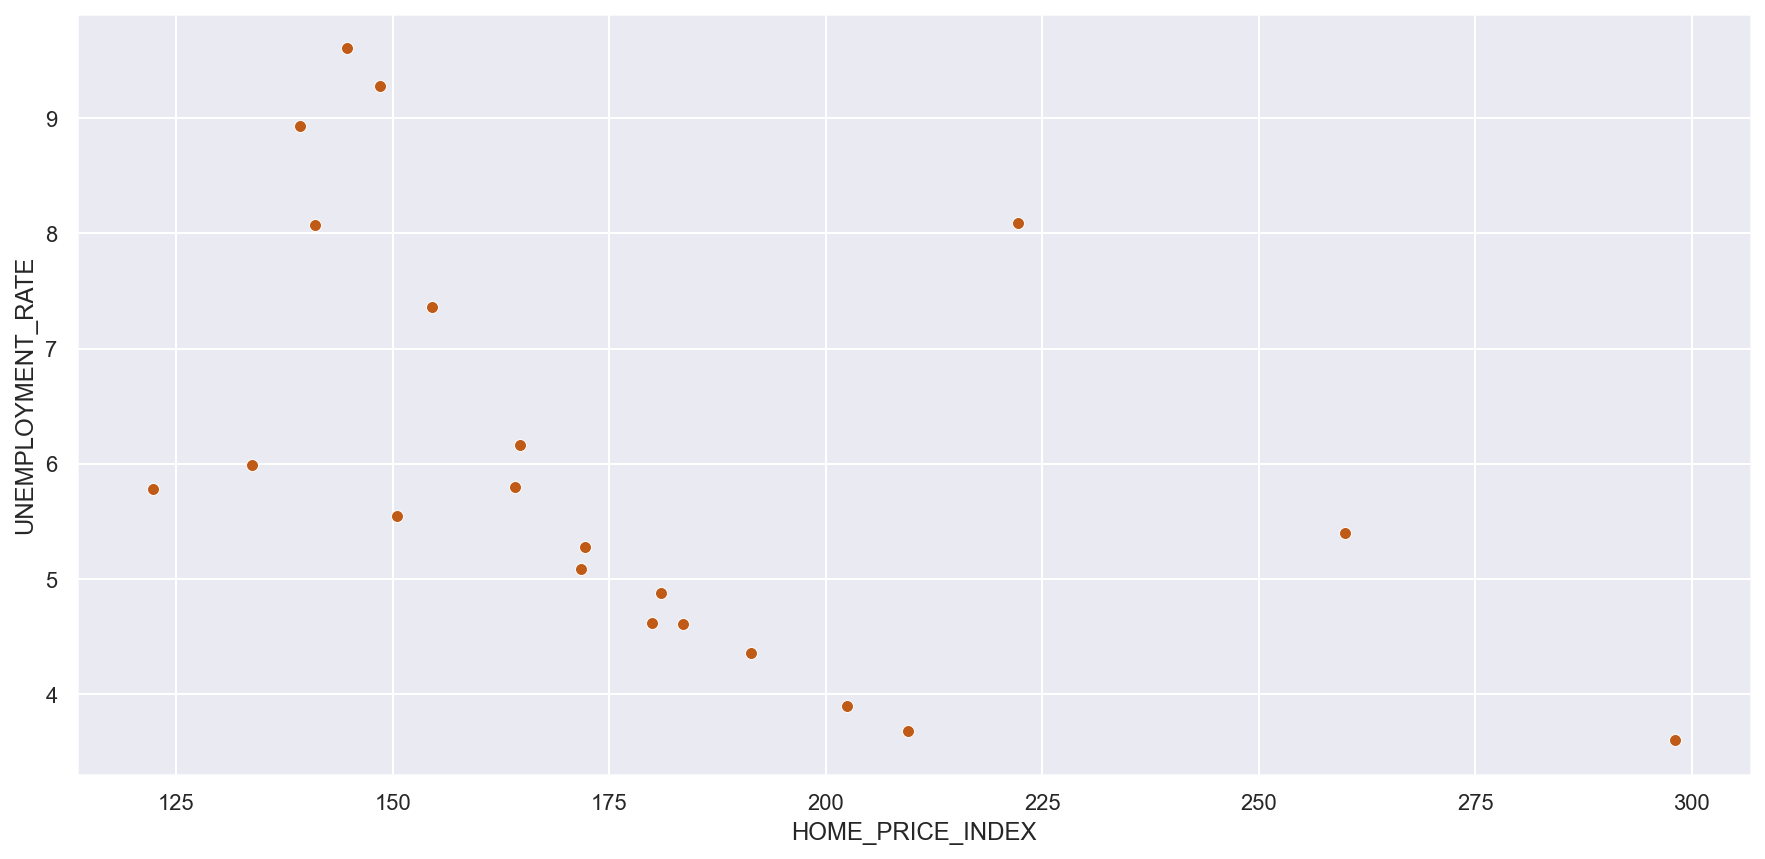

In [16]:
plt.figure(figsize = (15,7))
sns.scatterplot(data = df_homellc1 , x = 'HOME_PRICE_INDEX' , y = 'UNEMPLOYMENT_RATE')
plt.show;

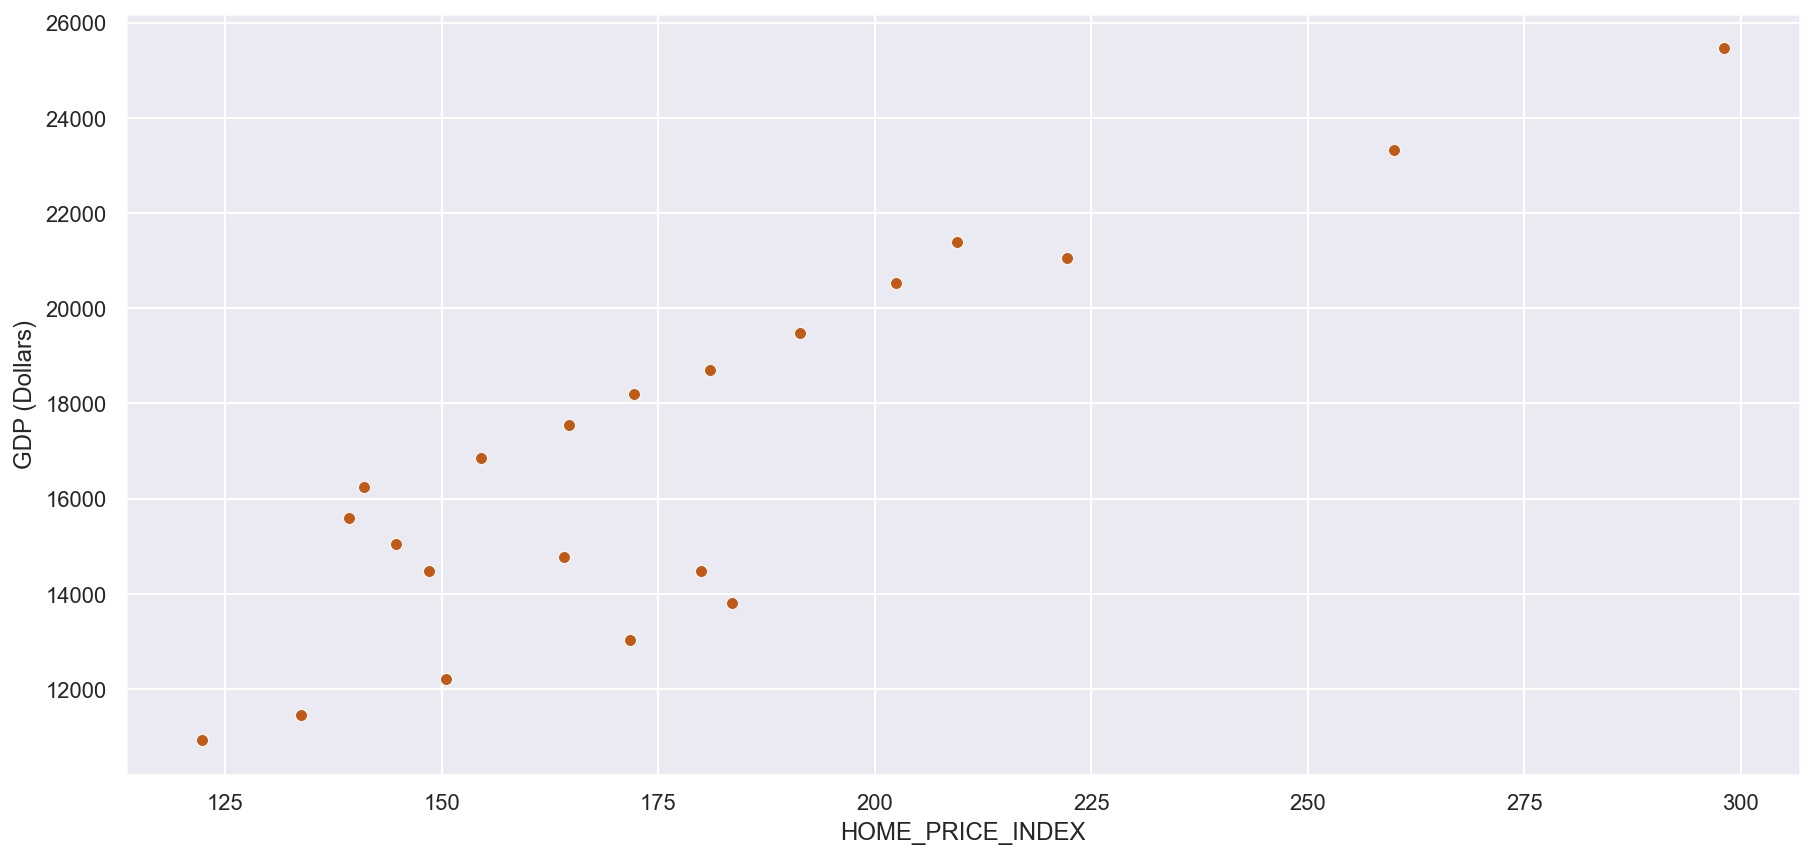

In [17]:
plt.figure(figsize = (15,7))
sns.scatterplot(data = df_homellc1 , x = 'HOME_PRICE_INDEX' , y = 'GDP (Dollars)')
plt.show;

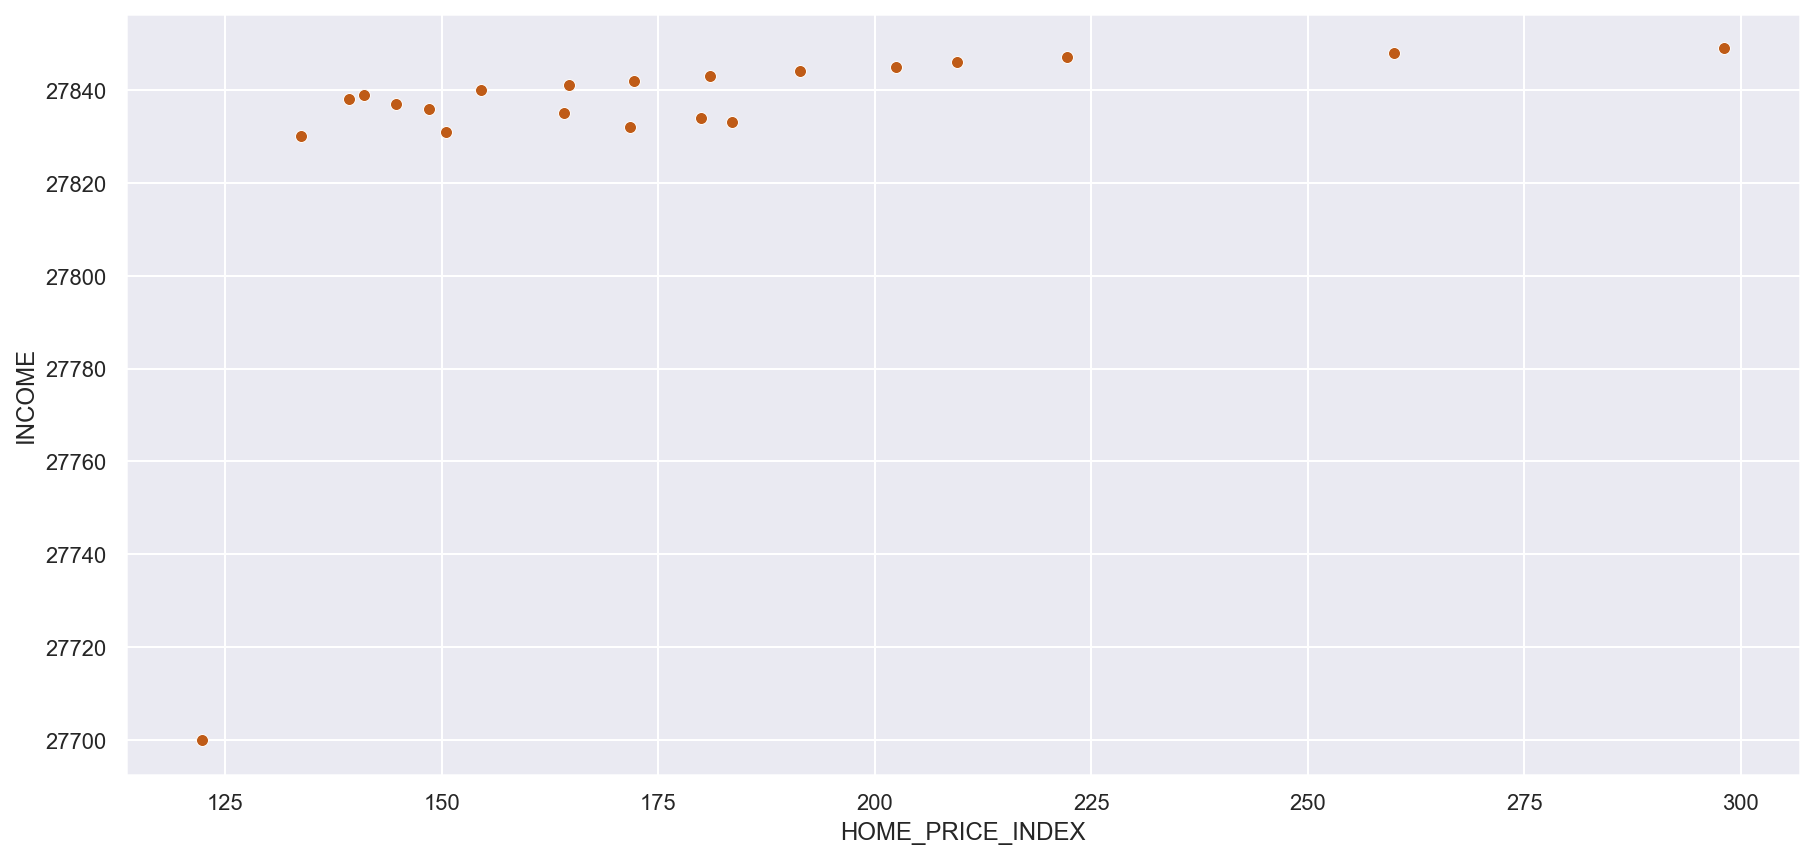

In [18]:
plt.figure(figsize = (15,7))
sns.scatterplot(data = df_homellc1 , x = 'HOME_PRICE_INDEX' , y = 'INCOME')
plt.show;

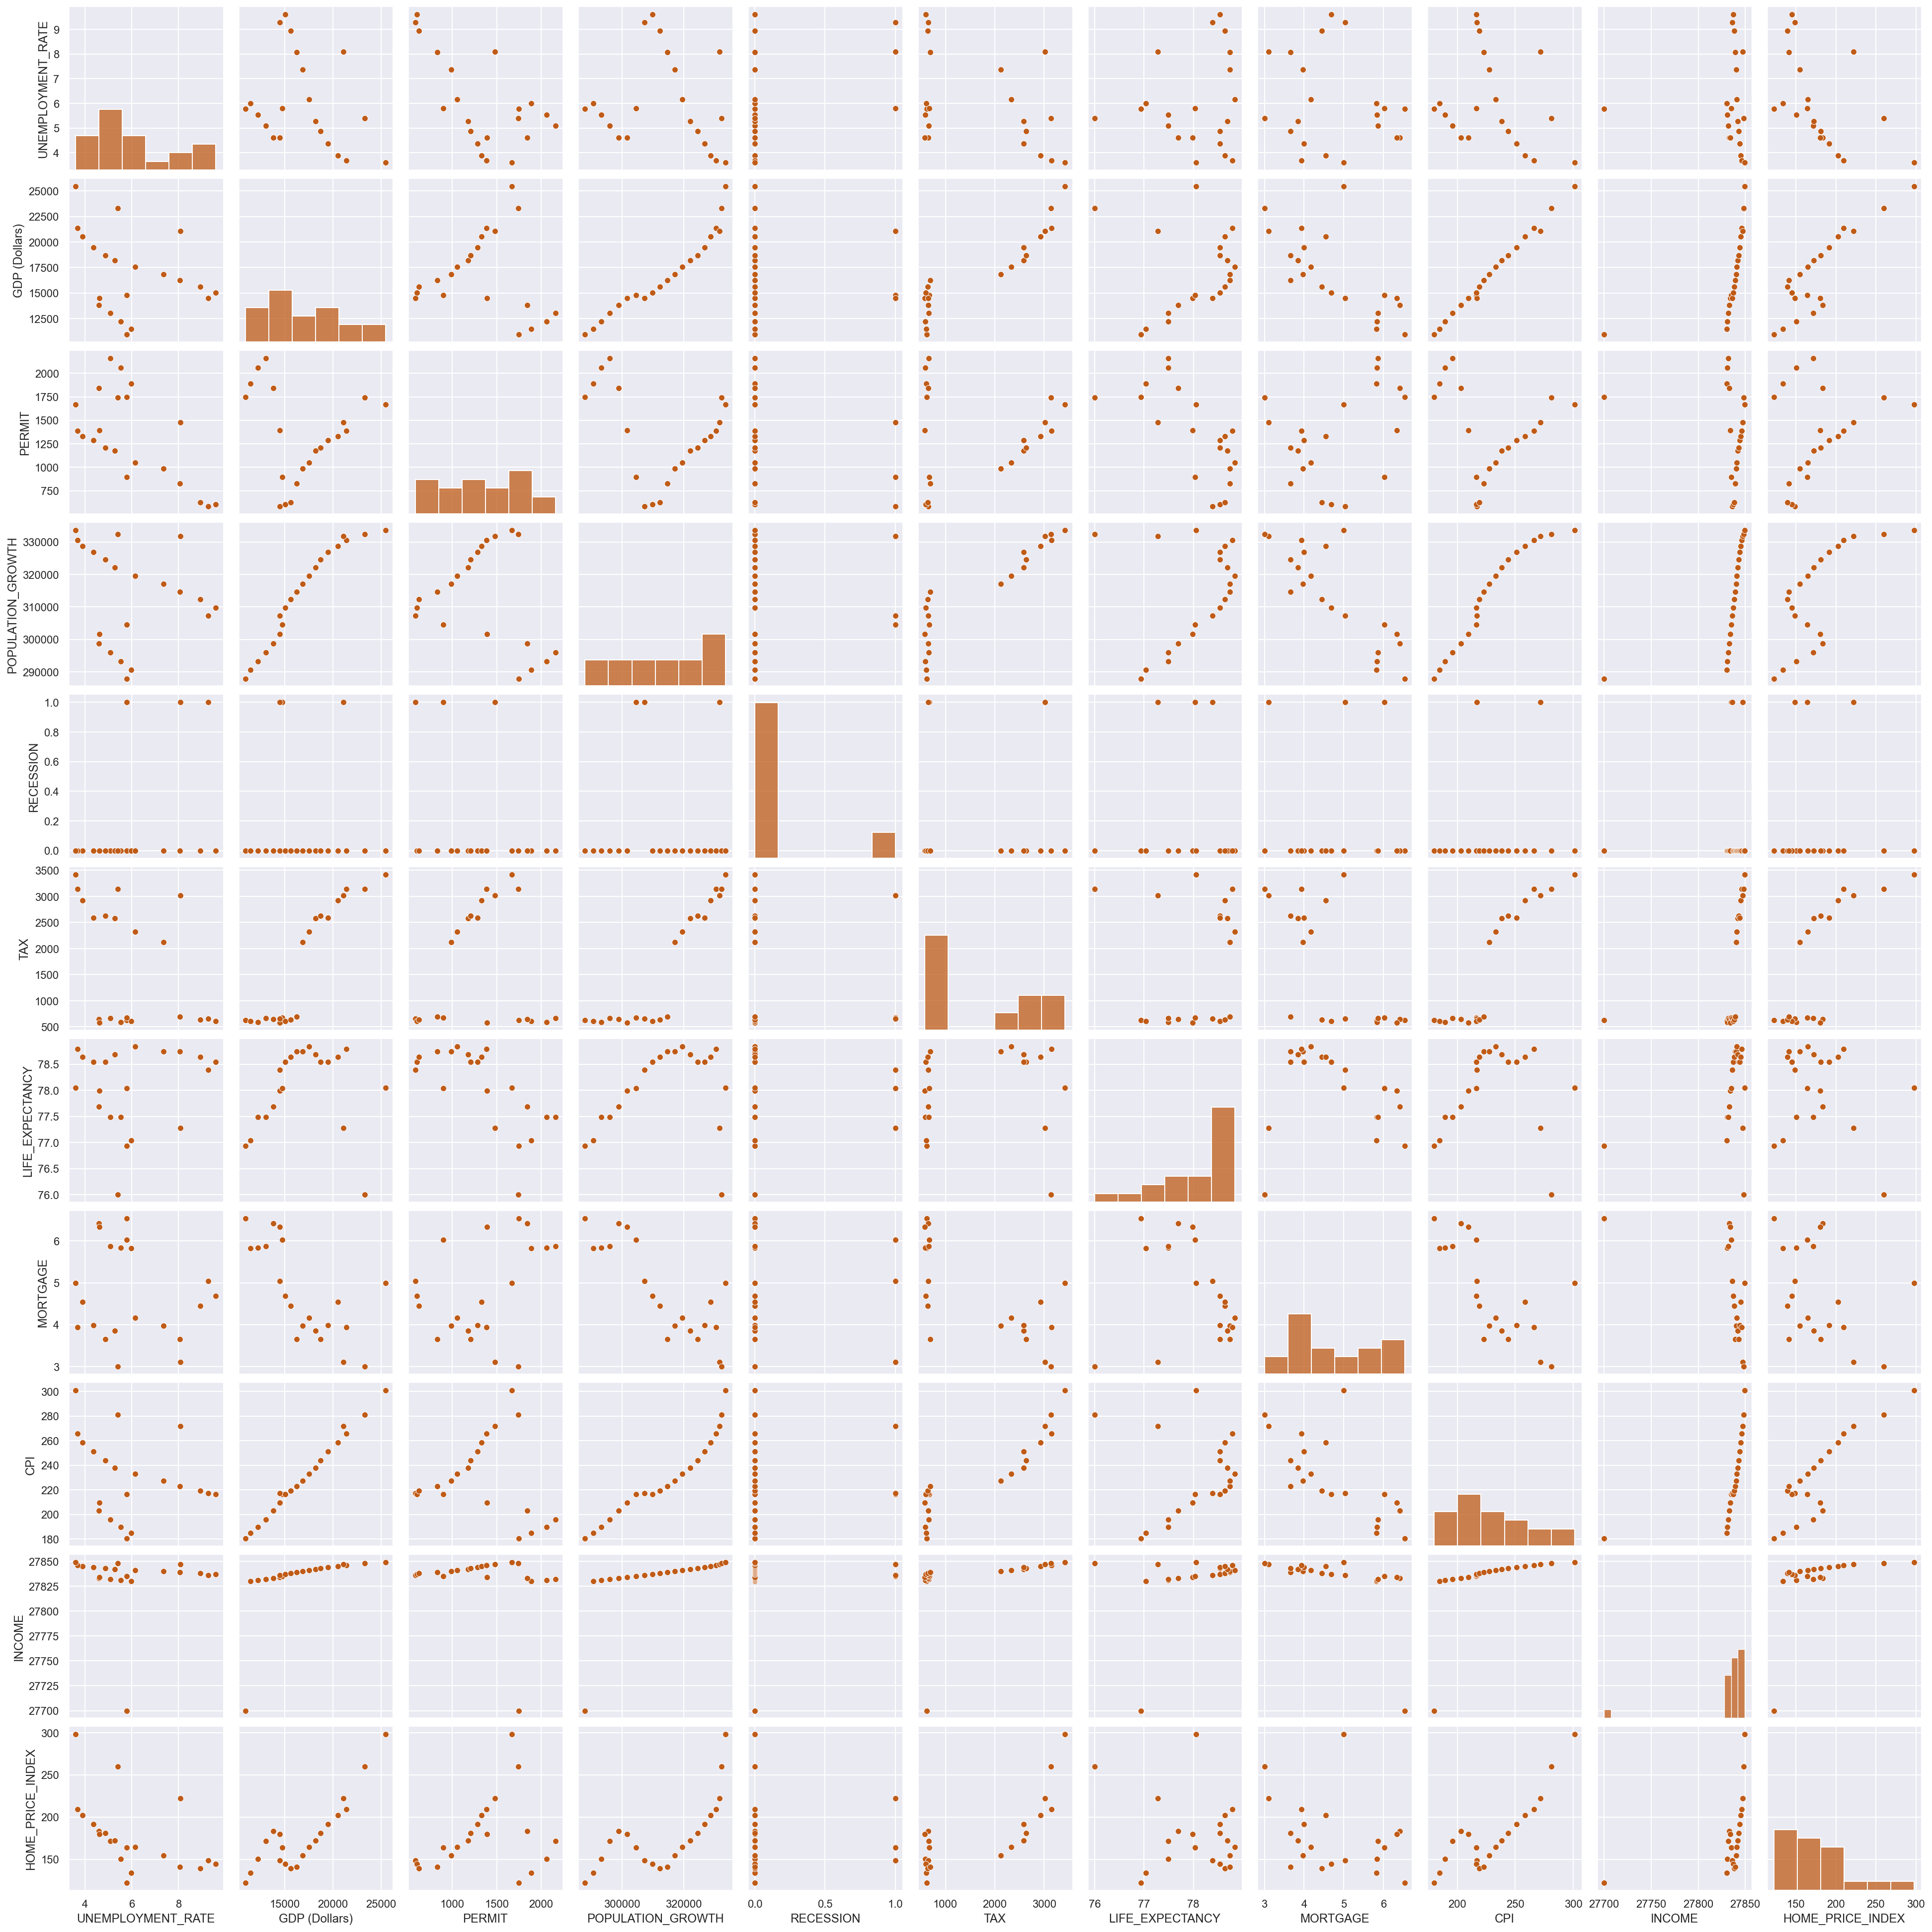

In [19]:
sns.pairplot(df_homellc1);

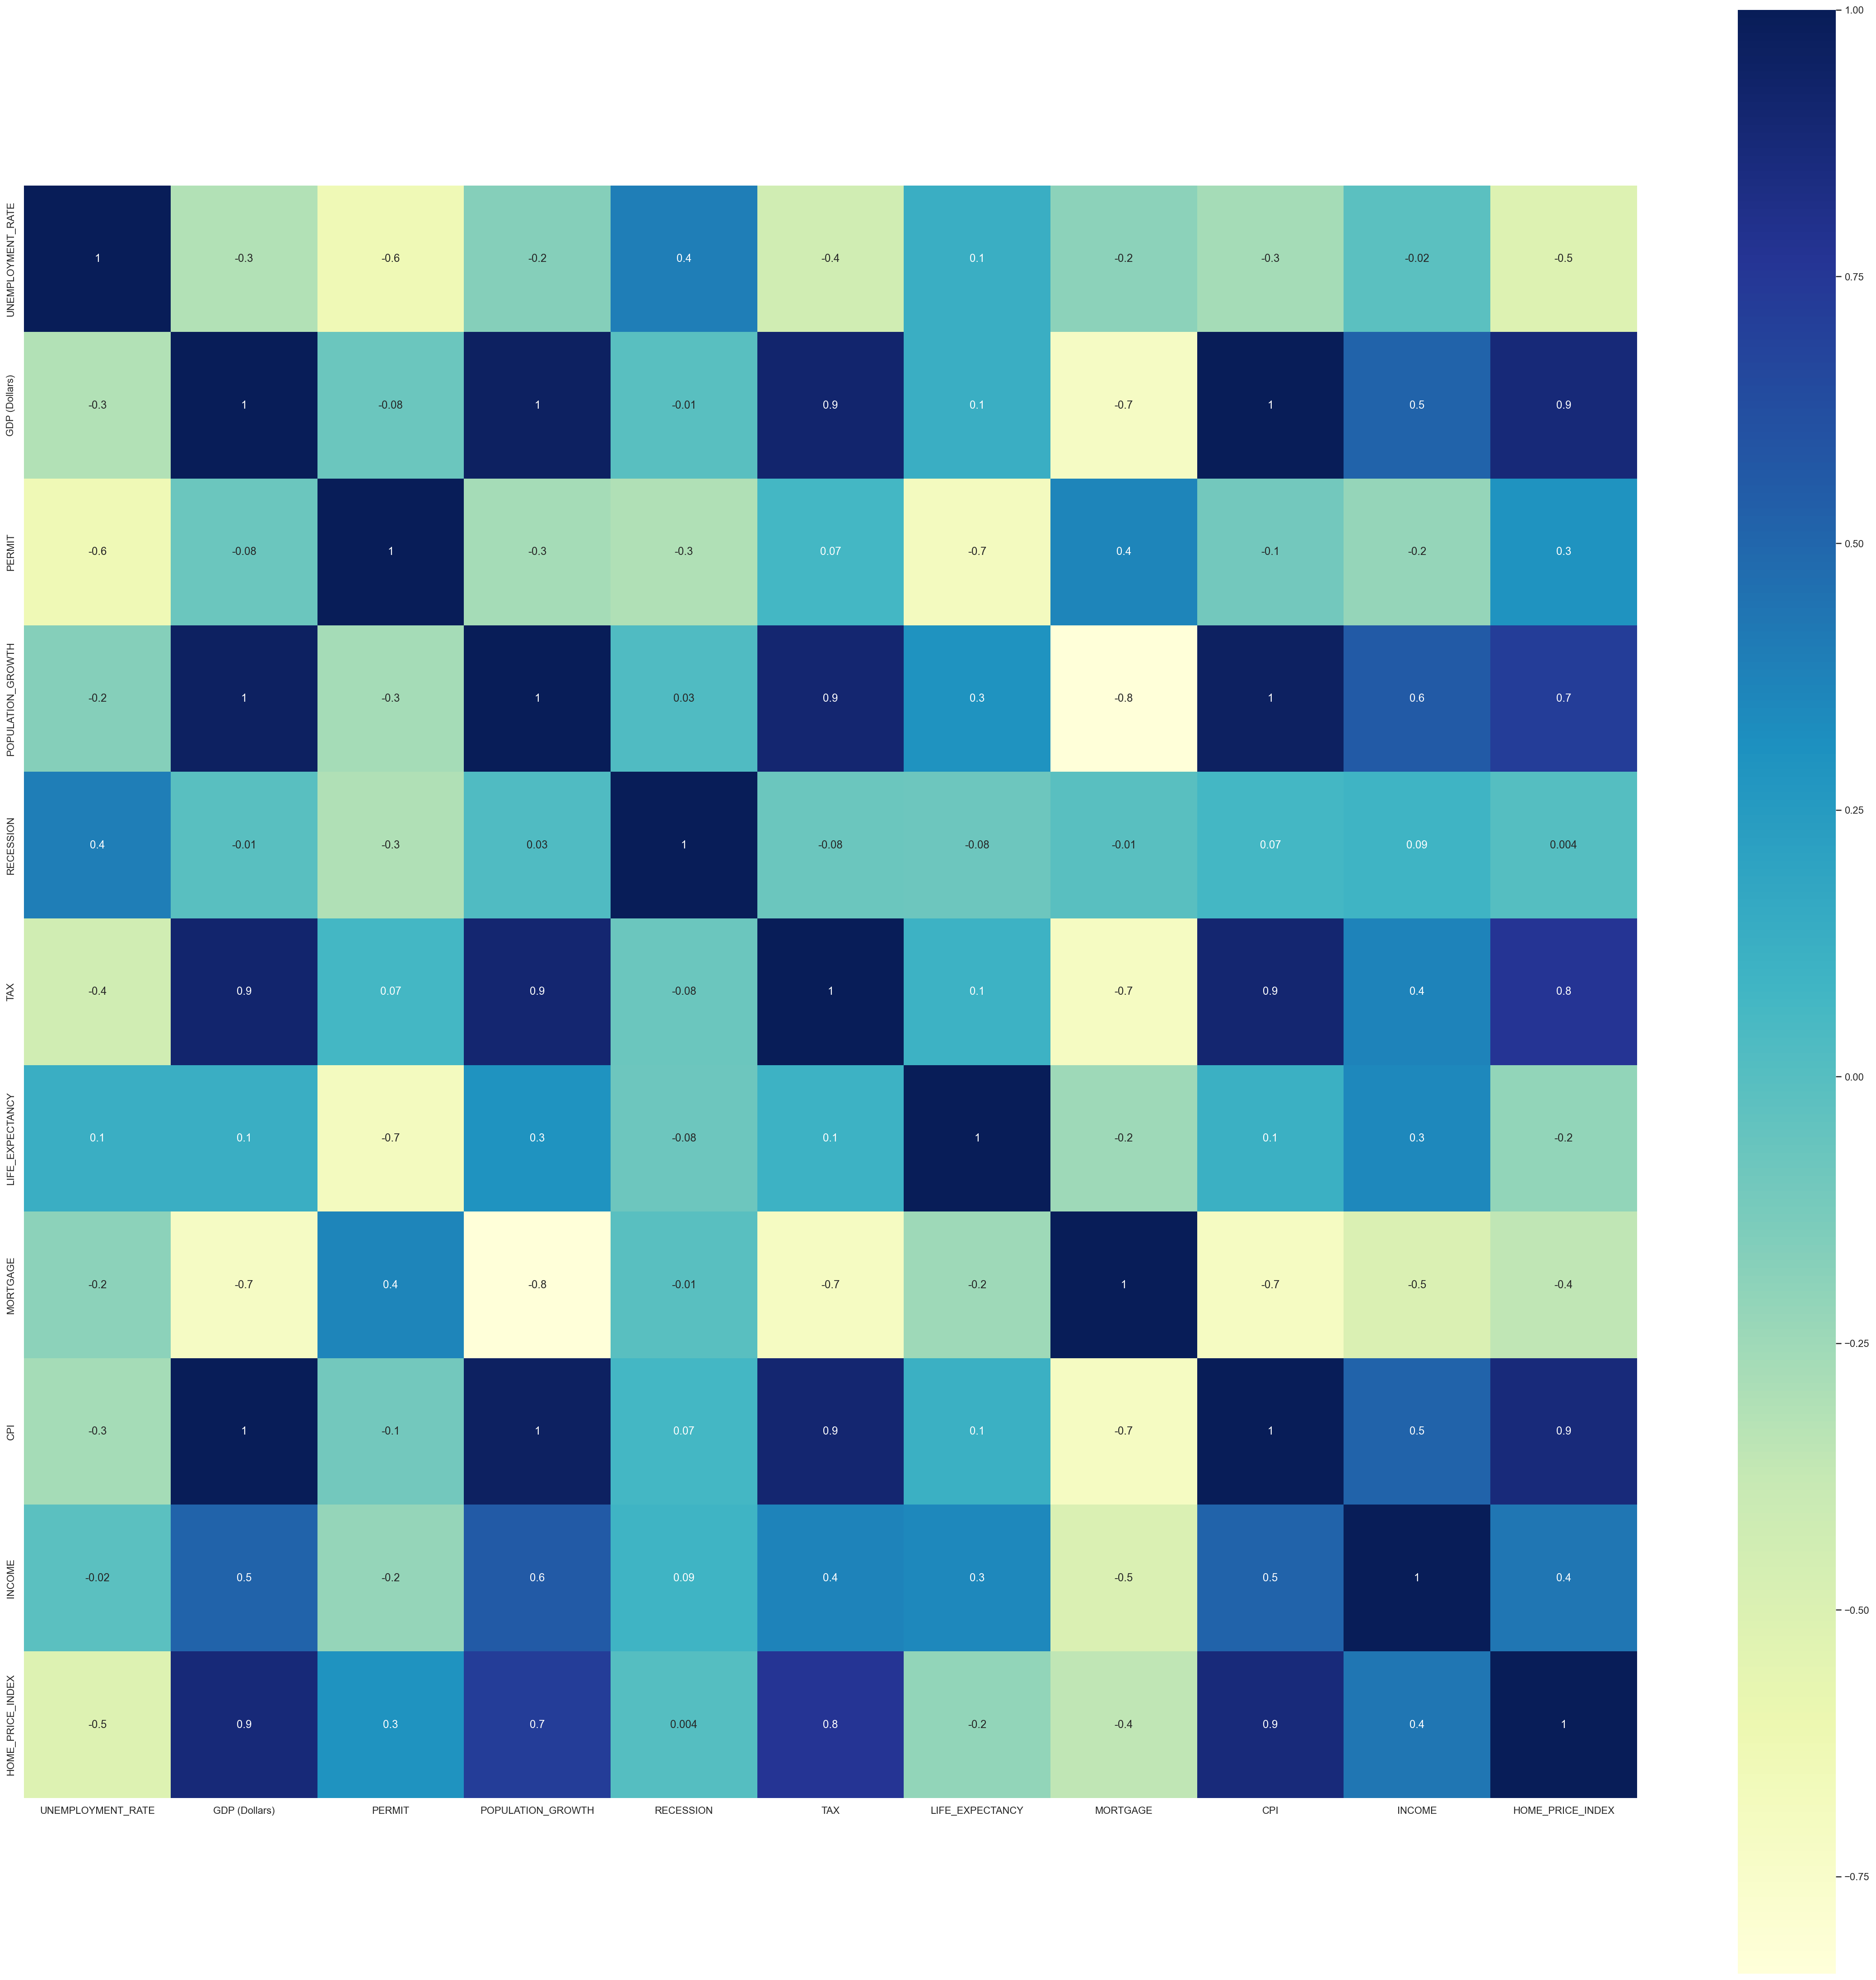

In [20]:
plt.figure(figsize=(40,40))
p=sns.heatmap(df_homellc1.corr(), annot=True,cmap='YlGnBu',square=True, fmt='.1g');

In [28]:
df_homellc1.corr().T

,UNEMPLOYMENT_RATE,GDP (Dollars),PERMIT,POPULATION_GROWTH,RECESSION,TAX,LIFE_EXPECTANCY,MORTGAGE,CPI,INCOME,HOME_PRICE_INDEX
UNEMPLOYMENT_RATE,1.000000,-0.313130,-0.632689,-0.169258,0.390116,-0.436357,0.125543,-0.187622,-0.269809,-0.016063,-0.511593
GDP (Dollars),-0.313130,1.000000,-0.077458,0.960027,-0.012378,0.917245,0.129476,-0.711846,0.996209,0.511183,0.870892
PERMIT,-0.632689,-0.077458,1.000000,-0.265995,-0.303275,0.071837,-0.682831,0.362879,-0.106361,-0.222367,0.298586
POPULATION_GROWTH,-0.169258,0.960027,-0.265995,1.000000,0.027486,0.904122,0.300270,-0.840928,0.959165,0.557317,0.715540
RECESSION,0.390116,-0.012378,-0.303275,0.027486,1.000000,-0.078205,-0.080584,-0.012139,0.066462,0.087442,0.003874
TAX,-0.436357,0.917245,0.071837,0.904122,-0.078205,1.000000,0.103789,-0.704694,0.905211,0.374051,0.768573
LIFE_EXPECTANCY,0.125543,0.129476,-0.682831,0.300270,-0.080584,0.103789,1.000000,-0.246174,0.121941,0.345642,-0.208873
MORTGAGE,-0.187622,-0.711846,0.362879,-0.840928,-0.012139,-0.704694,-0.246174,1.000000,-0.708905,-0.494321,-0.357743
CPI,-0.269809,0.996209,-0.106361,0.959165,0.066462,0.905211,0.121941,-0.708905,1.000000,0.511777,0.869068
INCOME,-0.016063,0.511183,-0.222367,0.557317,0.087442,0.374051,0.345642,-0.494321,0.511777,1.000000,0.425224


In [30]:
from scipy.stats import zscore
scaled_df=df_homellc1.apply(zscore)
scaled_df.head()

,UNEMPLOYMENT_RATE,GDP (Dollars),PERMIT,POPULATION_GROWTH,RECESSION,TAX,LIFE_EXPECTANCY,MORTGAGE,CPI,INCOME,HOME_PRICE_INDEX
0,-0.120273,-1.549153,0.901430,-1.762452,-0.408248,-0.934354,-1.481647,1.627376,-1.552865,-4.394000,-1.332002
1,-0.004837,-1.412014,1.201300,-1.578397,-0.408248,-0.947886,-1.348793,0.977830,-1.410599,-0.094495,-1.057454
2,-0.254178,-1.214175,1.565160,-1.396792,-0.408248,-0.962321,-0.749329,0.989032,-1.262069,-0.061422,-0.656609
3,-0.508136,-1.000407,1.785627,-1.208678,-0.408248,-0.897364,-0.749329,1.014179,-1.068641,-0.028348,-0.145690
4,-0.771329,-0.798502,1.105048,-1.014076,-0.408248,-0.913603,-0.483621,1.513951,-0.835534,0.004725,0.134820


In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif) 

In [32]:
X = df_homellc1.copy()
VIF = calc_vif(X).sort_values(by = 'VIF', ascending = False)
VIF

,variables,VIF
3,POPULATION_GROWTH,93724.239876
8,CPI,70864.329794
9,INCOME,70668.772664
6,LIFE_EXPECTANCY,60138.568756
1,GDP (Dollars),27681.074410
10,HOME_PRICE_INDEX,1016.980666
7,MORTGAGE,664.476573
2,PERMIT,127.480981
0,UNEMPLOYMENT_RATE,117.458045
5,TAX,69.820494


### We have done some Exploratory data analysis on the dataset. "UNEMPLOYMENT_RATE", "GDP", "CPI" are skewed at the right."LIFE_EXPECTANCY", "INCOME" are skewed at the left and all other coulmns are almost symmetric.
 
### When looking at the cor-relation values, we can see several pairs of independent variables have high correlation.

### From the scatter plot, we can come to the below conclusion:

#### 1)Unemployment_Rate is negatively correlated with Home_Price_Index.
#### 2)Population_Growth, GDP, CPI, are positively correlated with Home_Price_Index.
#### 3)Impact of the recession is reflected in almost all the plots.
#### 4)Mortgage and Permit has slightly negative impact.
#### 5)All other are almost positively correlated.

#### We have scaled the data, as all the columns are of different magnitude. Scaling will bring all the data in the same scale which will help the model to predict accurately.

#### We have tried to find the multi collineraity between the independent variables and we could see VIF values are very high which means varaibles have severe correlation. 

In [33]:
x = scaled_df.drop("HOME_PRICE_INDEX",axis = 1)
y = scaled_df.pop("HOME_PRICE_INDEX")

In [34]:
x.head(5)

,UNEMPLOYMENT_RATE,GDP (Dollars),PERMIT,POPULATION_GROWTH,RECESSION,TAX,LIFE_EXPECTANCY,MORTGAGE,CPI,INCOME
0,-0.120273,-1.549153,0.901430,-1.762452,-0.408248,-0.934354,-1.481647,1.627376,-1.552865,-4.394000
1,-0.004837,-1.412014,1.201300,-1.578397,-0.408248,-0.947886,-1.348793,0.977830,-1.410599,-0.094495
2,-0.254178,-1.214175,1.565160,-1.396792,-0.408248,-0.962321,-0.749329,0.989032,-1.262069,-0.061422
3,-0.508136,-1.000407,1.785627,-1.208678,-0.408248,-0.897364,-0.749329,1.014179,-1.068641,-0.028348
4,-0.771329,-0.798502,1.105048,-1.014076,-0.408248,-0.913603,-0.483621,1.513951,-0.835534,0.004725


In [35]:
y.head(5)

0   -1.332002
1   -1.057454
2   -0.656609
3   -0.145690
4    0.134820
Name: HOME_PRICE_INDEX, dtype: float64

In [36]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

In [37]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (14, 10)
X_test (7, 10)
y_train (14,)
y_test (7,)


In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [89]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, reg_model.coef_[idx]))

The coefficient for UNEMPLOYMENT_RATE is 0.21788462612348838
The coefficient for GDP (Dollars) is 1.4458315207327275
The coefficient for PERMIT is 0.527474630899386
The coefficient for POPULATION_GROWTH is 7.902006650107364
The coefficient for RECESSION is -0.10060639801384791
The coefficient for TAX is 0.17868175030426303
The coefficient for LIFE_EXPECTANCY is 0.05660091434459766
The coefficient for MORTGAGE is 0.007754949476957068
The coefficient for CPI is 3.2520999738013794
The coefficient for INCOME is -59.71379074945865


In [91]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': reg_model.coef_
})
importances = importances.sort_values(by='Importance', ascending=False)
importances

,Attribute,Importance
3,POPULATION_GROWTH,7.902007
8,CPI,3.252100
1,GDP (Dollars),1.445832
2,PERMIT,0.527475
0,UNEMPLOYMENT_RATE,0.217885
5,TAX,0.178682
6,LIFE_EXPECTANCY,0.056601
7,MORTGAGE,0.007755
4,RECESSION,-0.100606
9,INCOME,-59.713791


In [45]:
# intercept of the model

intercept = reg_model.intercept_

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 11.97253554163247


In [56]:
y_pred = reg_model.predict(X_test)
y_pred

array([ 1.24750355e-01,  1.90369903e+00, -5.26583411e-01,  4.43203541e-01,
       -1.11072398e-01, -2.48892843e-01,  2.53390317e+02])

In [50]:
# R square on training data
reg_model.score(X_train, y_train)

0.9980804809061151

In [51]:
# R square on testing data
reg_model.score(X_test, y_test)

-4732.076446384091

In [52]:
#RMSE on Training data
predicted_train=reg_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

0.02507754549418424

In [53]:
#RMSE on Testing data
predicted_test=reg_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

96.27907855640764

In [54]:
#MAPE ( Mean Absoulte Percentage Error) for train data
pred=reg_model.predict(X_train)
residual = y_train - pred
percentage_error = residual / y_train
np.abs(percentage_error).mean()

0.12499507759160454

In [55]:
#MAPE ( Mean Absoulte Percentage Error)for test data
pred=reg_model.predict(X_test)
residual = y_test - pred
percentage_error = residual / y_test
np.abs(percentage_error).mean()

27.67415831396766

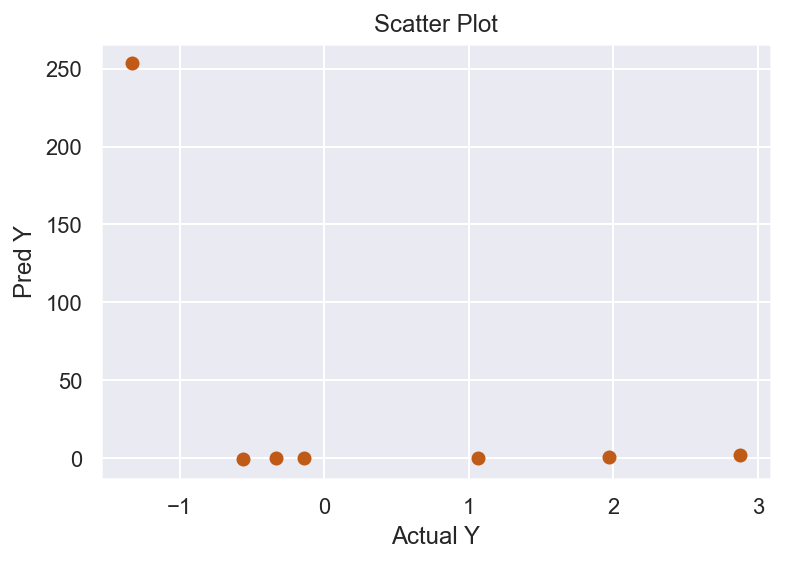

In [58]:
y_pred = reg_model.predict(X_test)
plt.scatter(y_test, y_pred)
plt.title('Scatter Plot')
plt.xlabel("Actual Y")
plt.ylabel("Pred Y");

In [66]:
import time
start = time.time()

for i in range(55):
    v = calc_vif(X).sort_values(by = 'VIF', ascending = False)
    if (v.iloc[0,1] > 30000):
        X = X.drop(columns=v.iloc[0,0])

end = time.time()
print('Time taken =', end-start)

Time taken = 8.176837682723999


In [67]:
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
1,GDP (Dollars),2308.258811
5,LIFE_EXPECTANCY,1346.970346
7,HOME_PRICE_INDEX,984.401715
6,MORTGAGE,218.378055
2,PERMIT,75.064717
4,TAX,58.947357
0,UNEMPLOYMENT_RATE,54.210060
3,RECESSION,2.097050


In [68]:
X.shape

(21, 8)

In [69]:
X.head()

,UNEMPLOYMENT_RATE,GDP (Dollars),PERMIT,RECESSION,TAX,LIFE_EXPECTANCY,MORTGAGE,HOME_PRICE_INDEX
0,5.783333,10929.10825,1749.000000,0,626,76.936585,6.537308,122.287667
1,5.991667,11456.44950,1888.416667,0,611,77.036585,5.826981,133.741500
2,5.541667,12217.19575,2057.583333,0,595,77.487805,5.839231,150.464333
3,5.083333,13039.19700,2160.083333,0,667,77.487805,5.866731,171.779333
4,4.608333,13815.58300,1843.666667,0,649,77.687805,6.413269,183.481917


In [70]:
scaled_df1=X.apply(zscore)
scaled_df1.head()

,UNEMPLOYMENT_RATE,GDP (Dollars),PERMIT,RECESSION,TAX,LIFE_EXPECTANCY,MORTGAGE,HOME_PRICE_INDEX
0,-0.120273,-1.549153,0.901430,-0.408248,-0.934354,-1.481647,1.627376,-1.332002
1,-0.004837,-1.412014,1.201300,-0.408248,-0.947886,-1.348793,0.977830,-1.057454
2,-0.254178,-1.214175,1.565160,-0.408248,-0.962321,-0.749329,0.989032,-0.656609
3,-0.508136,-1.000407,1.785627,-0.408248,-0.897364,-0.749329,1.014179,-0.145690
4,-0.771329,-0.798502,1.105048,-0.408248,-0.913603,-0.483621,1.513951,0.134820


In [71]:
x1 = scaled_df1.drop("HOME_PRICE_INDEX",axis = 1)
y1 = scaled_df1.pop("HOME_PRICE_INDEX")

In [72]:
x1.head()

,UNEMPLOYMENT_RATE,GDP (Dollars),PERMIT,RECESSION,TAX,LIFE_EXPECTANCY,MORTGAGE
0,-0.120273,-1.549153,0.901430,-0.408248,-0.934354,-1.481647,1.627376
1,-0.004837,-1.412014,1.201300,-0.408248,-0.947886,-1.348793,0.977830
2,-0.254178,-1.214175,1.565160,-0.408248,-0.962321,-0.749329,0.989032
3,-0.508136,-1.000407,1.785627,-0.408248,-0.897364,-0.749329,1.014179
4,-0.771329,-0.798502,1.105048,-0.408248,-0.913603,-0.483621,1.513951


In [73]:
y1.head()

0   -1.332002
1   -1.057454
2   -0.656609
3   -0.145690
4    0.134820
Name: HOME_PRICE_INDEX, dtype: float64

In [74]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.3, random_state=100)

In [76]:
print('X_train1',X_train1.shape)
print('X_test1',X_test1.shape)
print('y_train1',y_train1.shape)
print('y_test1',y_test1.shape)

X_train1 (14, 7)
X_test1 (7, 7)
y_train1 (14,)
y_test1 (7,)


In [77]:
reg_model1 = LinearRegression()
reg_model1.fit(X_train1, y_train1)

LinearRegression()

In [78]:
for idx, col_name in enumerate(X_train1.columns):
    print("The coefficient for {} is {}".format(col_name, reg_model1.coef_[idx]))

The coefficient for UNEMPLOYMENT_RATE is -0.13424499188286323
The coefficient for GDP (Dollars) is 0.9204436562788072
The coefficient for PERMIT is 0.19388407891381199
The coefficient for RECESSION is 0.10396325770367859
The coefficient for TAX is -0.14734810646437974
The coefficient for LIFE_EXPECTANCY is 0.16284855976466445
The coefficient for MORTGAGE is 0.3809660599254157


In [96]:
# intercept of the model

intercept1 = reg_model1.intercept_

print("The intercept for our model is {}".format(intercept1))

The intercept for our model is -0.12852267261141836


In [80]:
y_pred1 = reg_model1.predict(X_test1)
y_pred1

array([ 0.11017618,  2.051083  , -0.60925701,  0.33112296, -0.16459199,
        0.0242543 , -0.88958828])

In [81]:
# R square on testing data
reg_model1.score(X_test1, y_test1)

0.6645061821839036

In [82]:
#RMSE on Testing data
predicted_test1=reg_model1.fit(X_train1, y_train1).predict(X_test1)
np.sqrt(metrics.mean_squared_error(y_test1,predicted_test1))

0.8105922115188563

In [83]:
#MAPE ( Mean Absoulte Percentage Error)for test data
pred1=reg_model1.predict(X_test1)
residual1 = y_test1 - pred1
percentage_error1 = residual1 / y_test1
np.abs(percentage_error).mean()

27.67415831396766

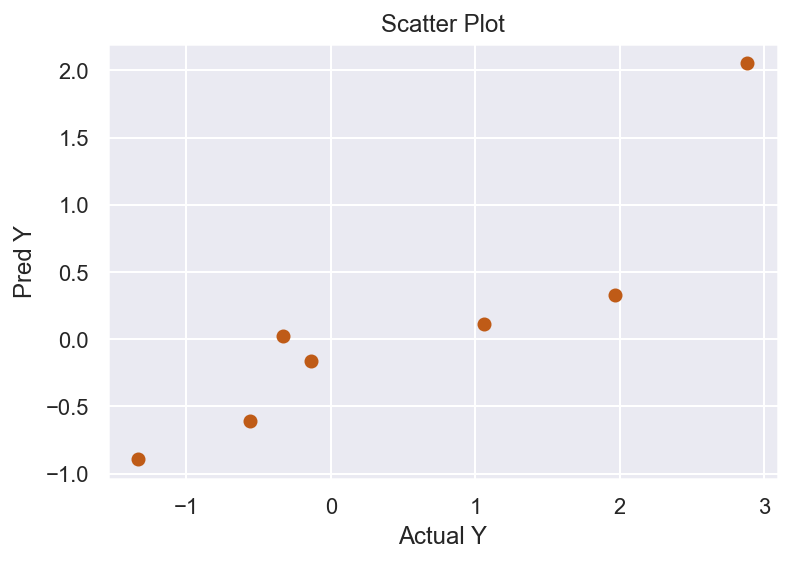

In [84]:
y_pred1 = reg_model1.predict(X_test1)
plt.scatter(y_test1, y_pred1)
plt.title('Scatter Plot')
plt.xlabel("Actual Y")
plt.ylabel("Pred Y");

In [94]:
importances1 = pd.DataFrame(data={
    'Attribute': X_train1.columns,
    'Importance1': reg_model1.coef_
})
importances1 = importances1.sort_values(by='Importance1', ascending=False)
importances1

,Attribute,Importance1
1,GDP (Dollars),0.920444
6,MORTGAGE,0.380966
2,PERMIT,0.193884
5,LIFE_EXPECTANCY,0.162849
3,RECESSION,0.103963
0,UNEMPLOYMENT_RATE,-0.134245
4,TAX,-0.147348


#### We have choosen the Linear regression as the model here to find the factor influencing the US Home prices.

#### Due to high multicolinearity among the independent variables, we have ignored some columns based on the VIF value and built model over remaining columns.

#### From the above table, we can see that "GDP(Dollars)" is the factor that influence the US Home prices as it has the coefficient very close to 1 and followed by "Mortgage" and "Permit". We can also observer "Unemployment_Rate" and "Tax" has less influence on the US Home prices.

#### Most of the variable increase with time. So, it is expected that it will have high correlation. So, instead of depending upon the linear model, we can directly study the impact of variables on the home price index using the scatter plots.
